## Systematic Trading model
### Logistic Regression Model

In [103]:
# Imports :
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import yfinance as yf
import plotly.graph_objects as go
import plotly.io as pio
import datetime as dt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
pio.templates.default = "plotly_white"
from plotly.subplots import make_subplots


## Data recovery and some plots:

In [104]:
# Imports de capitalisations boursières des grandes entreprises du tourisme
def get_data(assets, start_date, end_date):
    """
    Download data from Yahoo Finance
    """
    return yf.download(assets, start=start_date, end=end_date)['Adj Close']

raw_materials =['GOLD','BZ=F','SI=F','HG=F','NG=F','KC=F','ZC=F','ZO=F','KE=F','ZR=F','ZS=F','HE=F','LE=F','CC=F','CT=F','LBS=F','OJ=F']
N = 6000 # Complétez avec le nombre de jours historiques

start_date = dt.datetime.now() - dt.timedelta(days=N)
end_date = dt.datetime.now()

raw_materials_data=get_data(raw_materials, start_date,end_date)

[*********************100%%**********************]  17 of 17 completed


In [105]:
num_nan = raw_materials_data.isna().sum().sum()
total_cells = raw_materials_data.size

print("Nan number in raw_materials_data :", num_nan)
print("Total cells number :", total_cells)


Nan number in raw_materials_data : 3871
Total cells number : 70295


In [106]:
fig = go.Figure()
for a in raw_materials:
    fig.add_trace(go.Scatter(x=raw_materials_data.index, y=raw_materials_data[a], name=a))
fig.update_layout(title='Raw materials price evolution', yaxis_title='Prix en $')
fig.show()

In [107]:
raw_materials_data.index = pd.to_datetime(raw_materials_data.index)

# Calculus of the returns
raw_materials_returns = np.log(raw_materials_data / raw_materials_data.shift(1))

# Renaming the columns
raw_materials_returns.columns = [col + '_log_return' for col in raw_materials_data.columns]

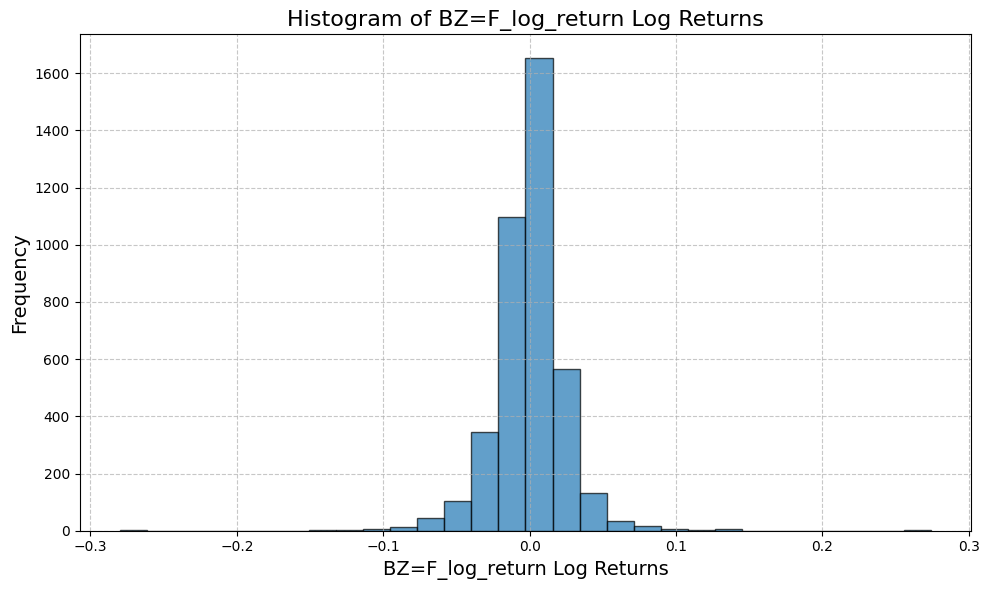

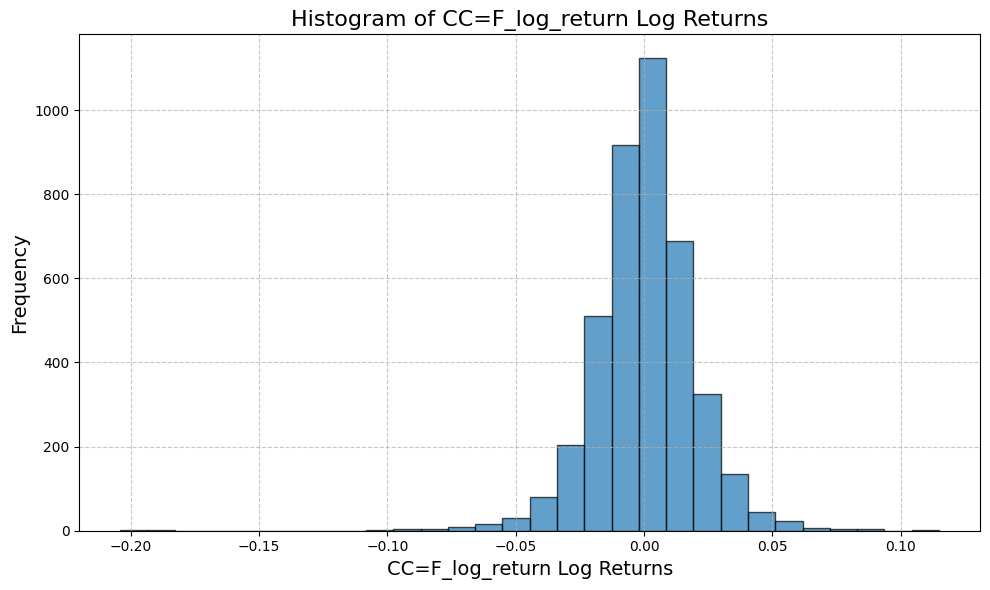

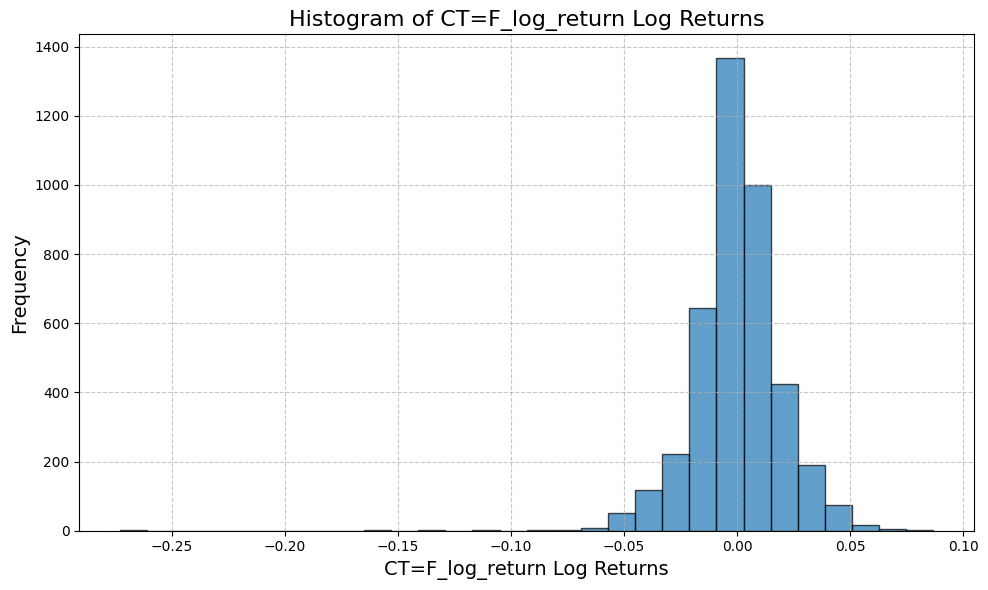

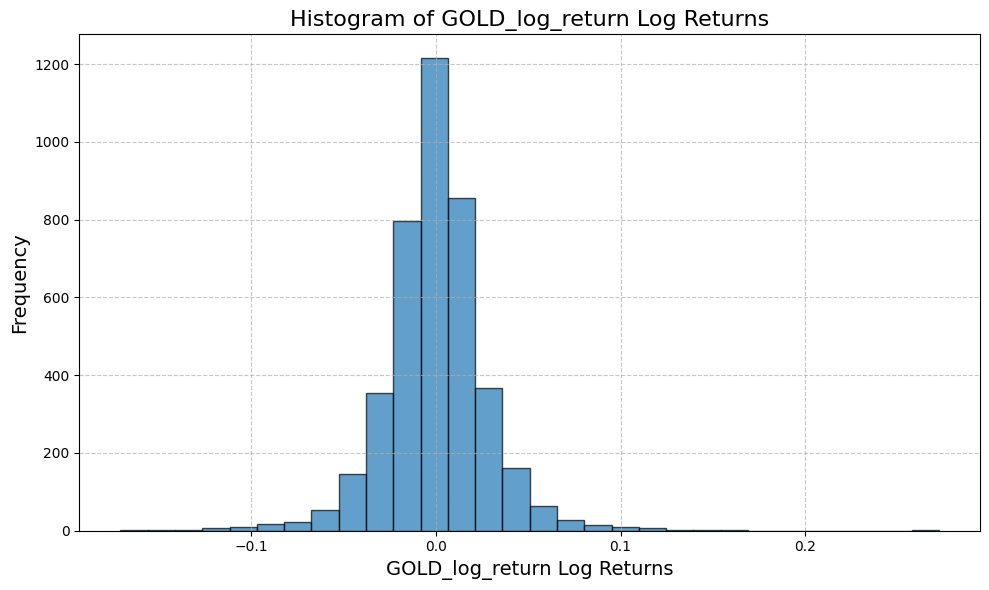

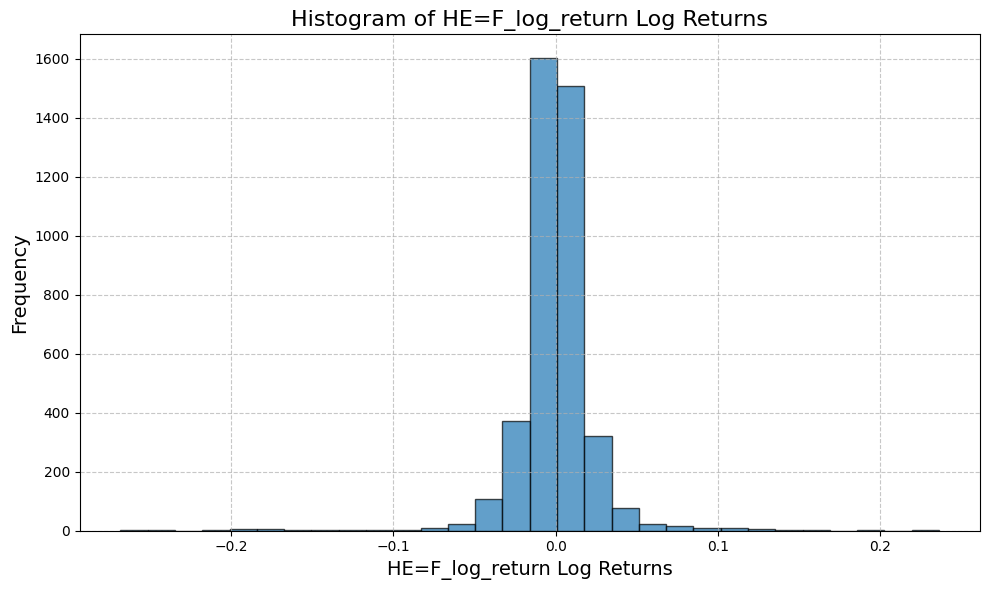

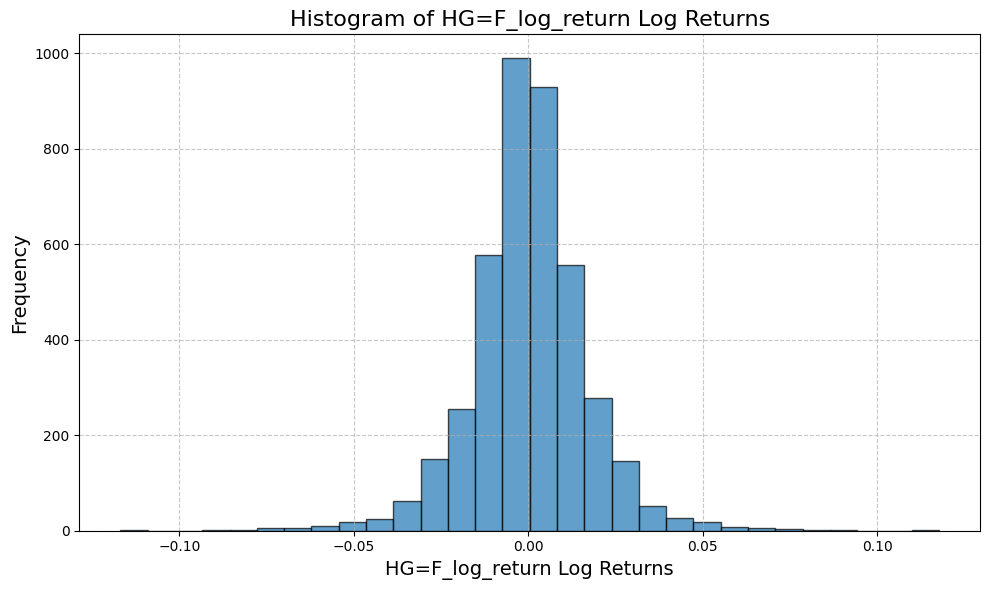

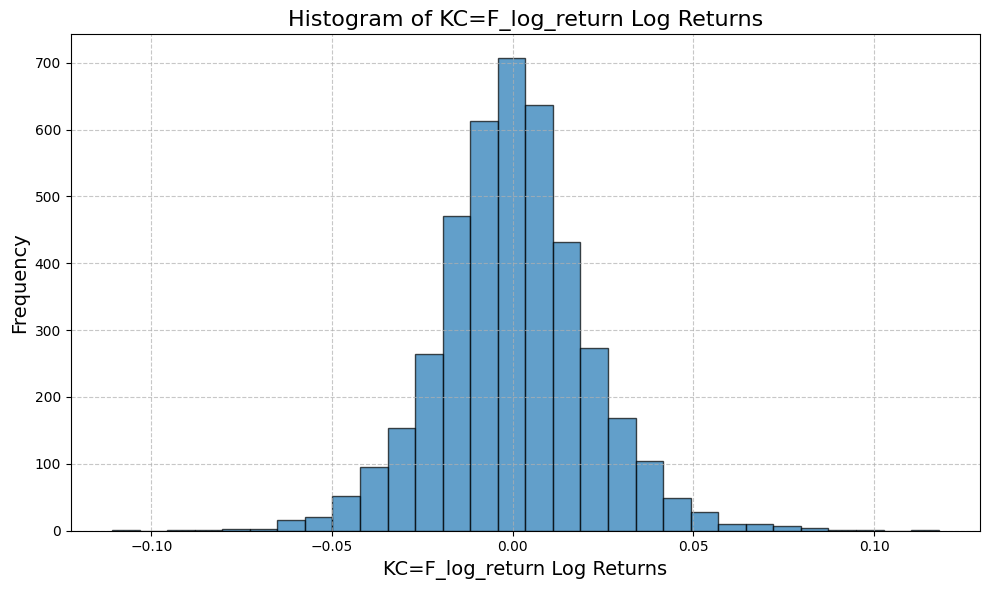

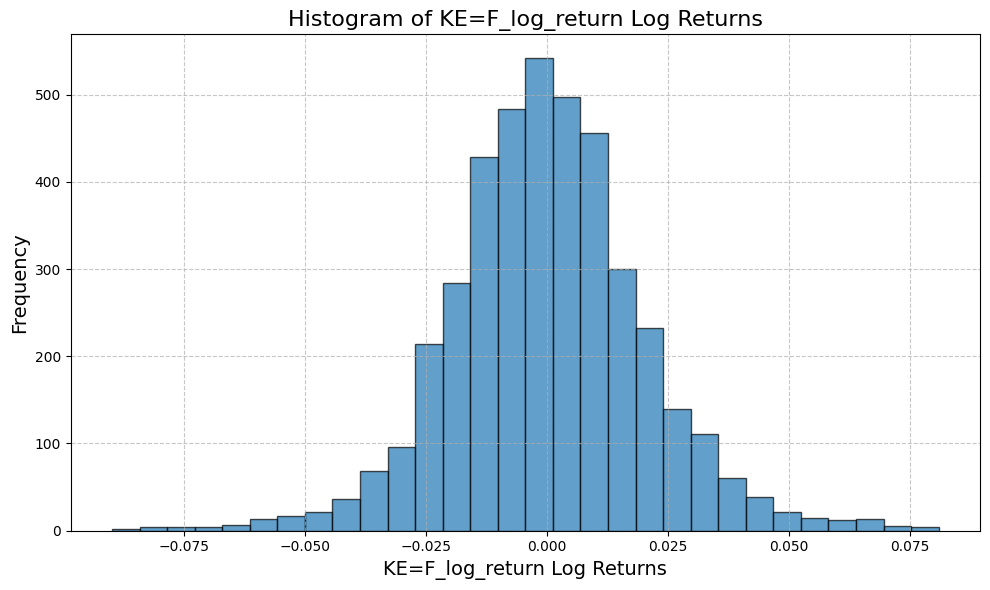

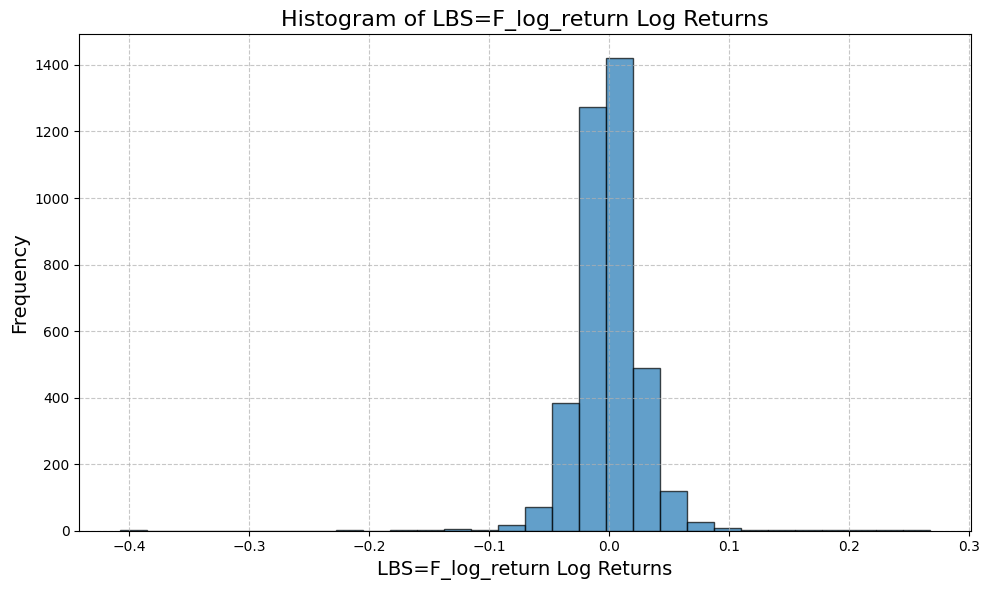

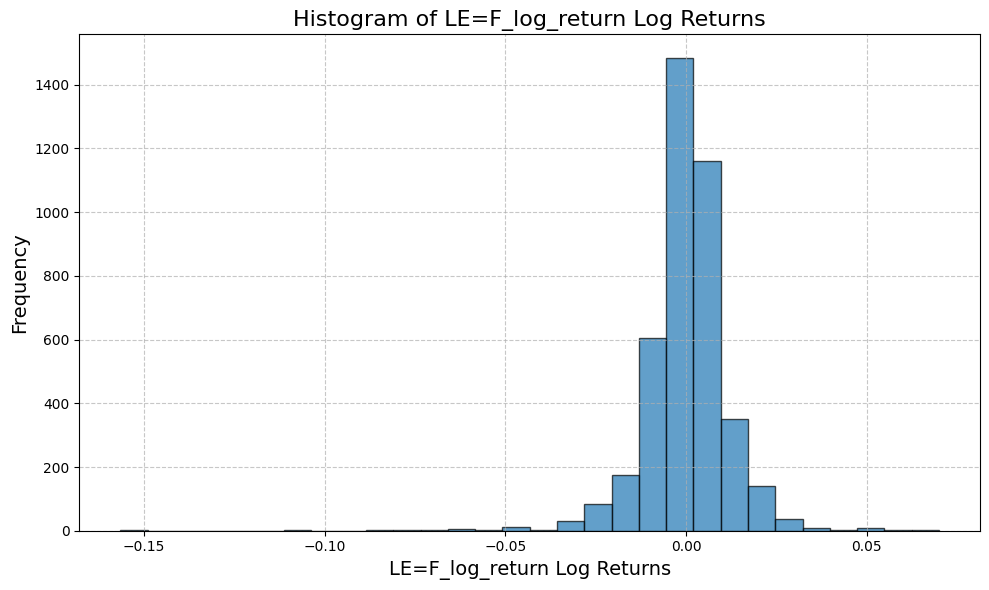

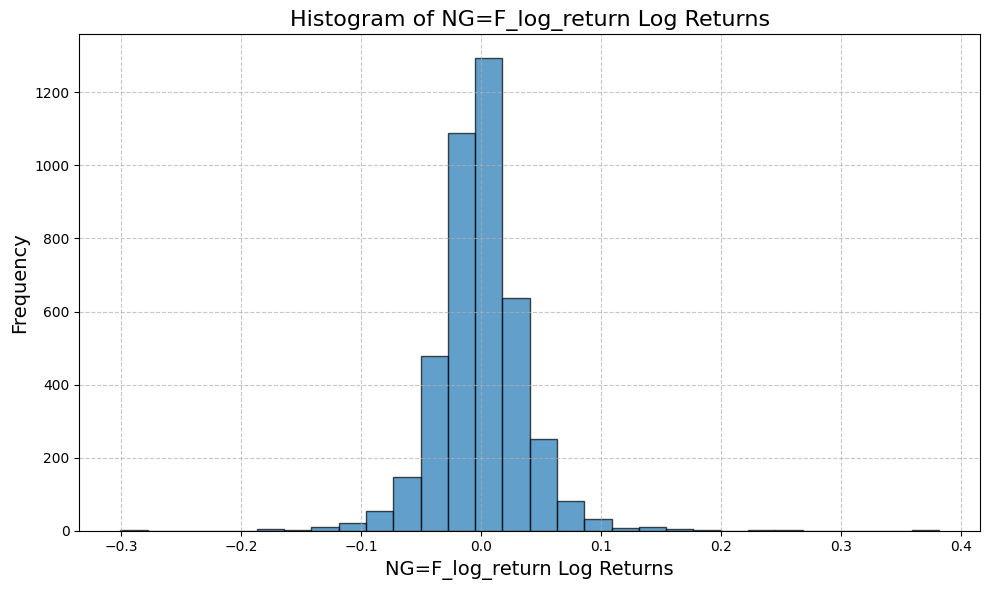

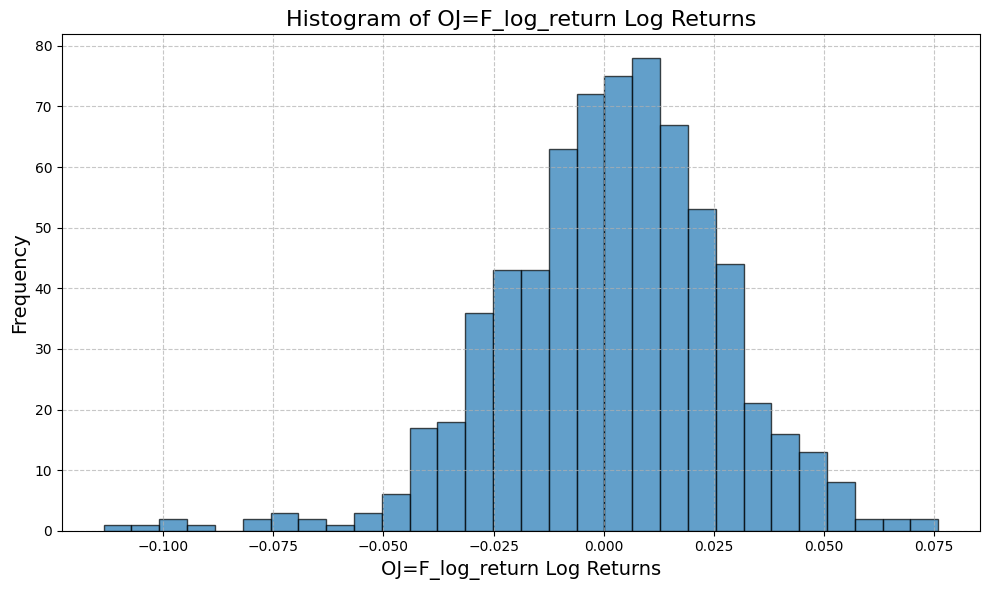

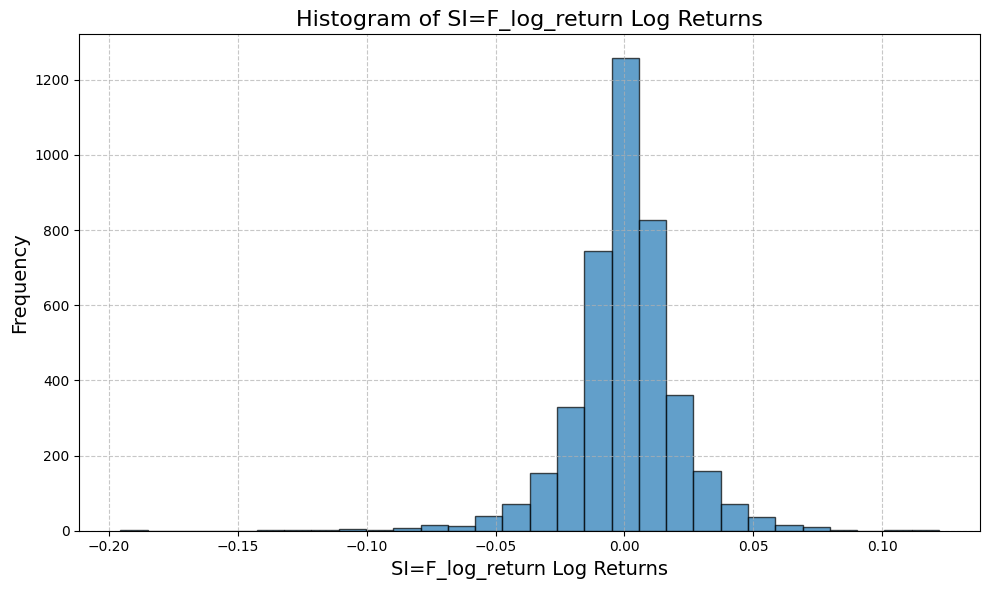

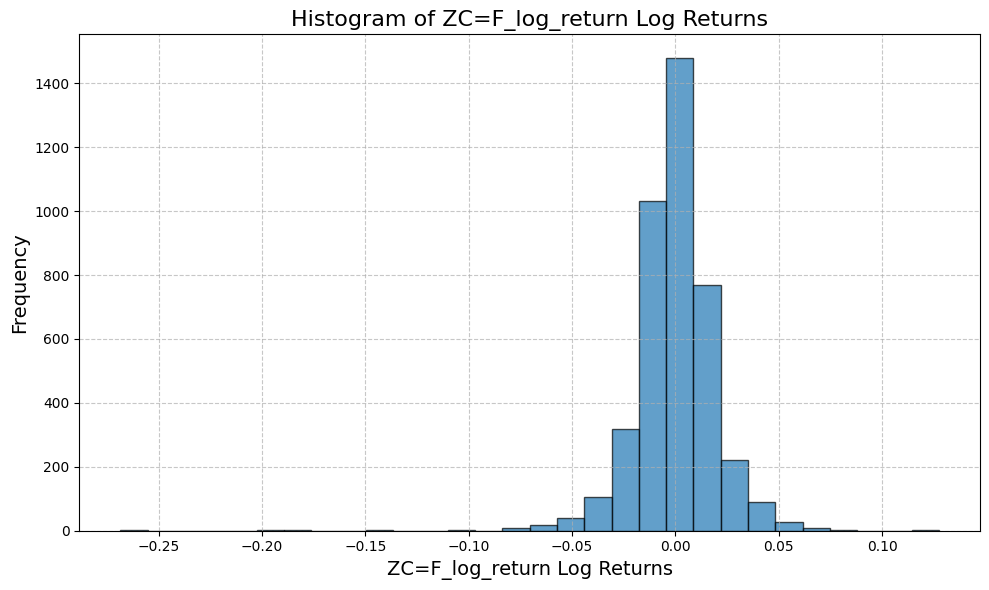

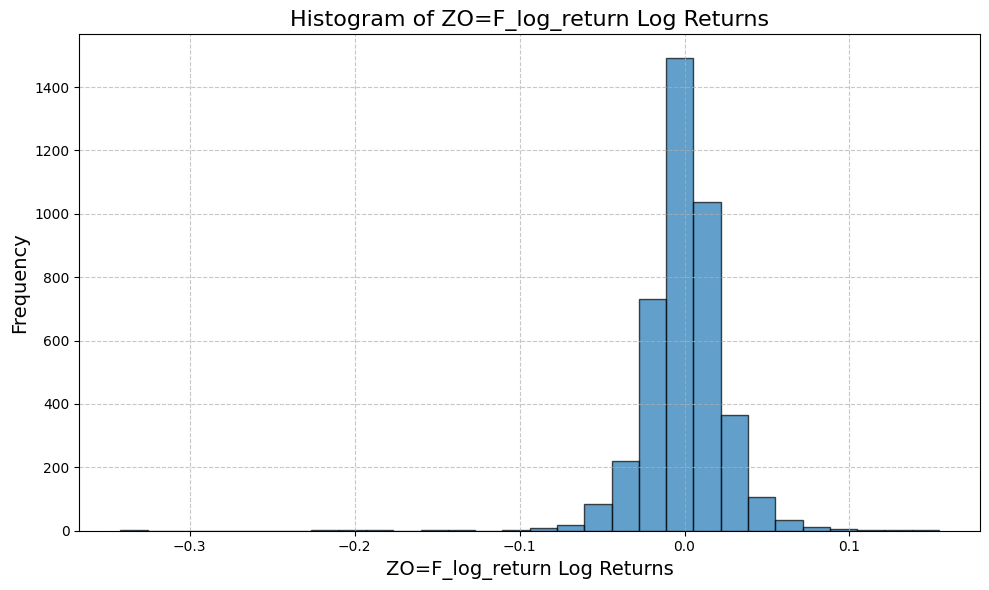

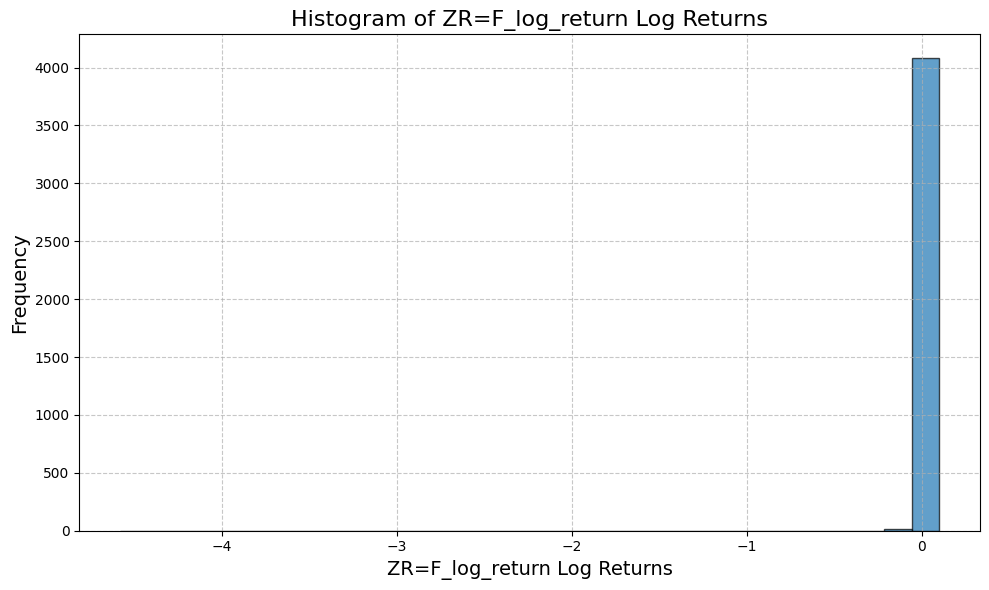

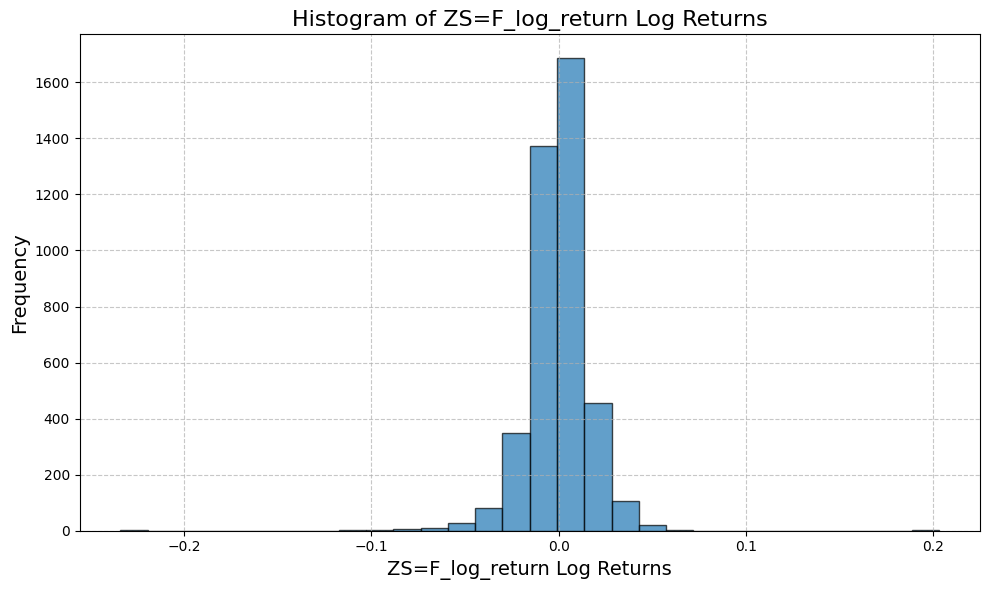

In [111]:
# Loop through each column in the DataFrame
for column in raw_materials_returns.columns:
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Plot histogram of returns
    plt.hist(raw_materials_returns[column], bins=30, edgecolor='k', alpha=0.7)
    
    # Set labels and title
    plt.xlabel(f'{column} Log Returns', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Histogram of {column} Log Returns', fontsize=16)
    
    # Add a grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Show the plot
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()


## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [113]:
raw_materials_returns.fillna(0, inplace=True)

In [114]:
# Create a binary target variable (1 if return > 1%, 0 otherwise)
for column in raw_materials_returns.columns:
    raw_materials_returns[column + 'Target'] = np.where(raw_materials_returns[column].shift(-1)  > 0.01 , 1, 0)

In [115]:
raw_materials_returns.dropna(inplace=True)

In [116]:
raw_materials_returns.columns

Index(['BZ=F_log_return', 'CC=F_log_return', 'CT=F_log_return',
       'GOLD_log_return', 'HE=F_log_return', 'HG=F_log_return',
       'KC=F_log_return', 'KE=F_log_return', 'LBS=F_log_return',
       'LE=F_log_return', 'NG=F_log_return', 'OJ=F_log_return',
       'SI=F_log_return', 'ZC=F_log_return', 'ZO=F_log_return',
       'ZR=F_log_return', 'ZS=F_log_return', 'BZ=F_log_returnTarget',
       'CC=F_log_returnTarget', 'CT=F_log_returnTarget',
       'GOLD_log_returnTarget', 'HE=F_log_returnTarget',
       'HG=F_log_returnTarget', 'KC=F_log_returnTarget',
       'KE=F_log_returnTarget', 'LBS=F_log_returnTarget',
       'LE=F_log_returnTarget', 'NG=F_log_returnTarget',
       'OJ=F_log_returnTarget', 'SI=F_log_returnTarget',
       'ZC=F_log_returnTarget', 'ZO=F_log_returnTarget',
       'ZR=F_log_returnTarget', 'ZS=F_log_returnTarget'],
      dtype='object')

In [117]:
np.array(raw_materials_returns[columns]).shape

(4135, 17)

In [118]:
# Split the data into input (X) and target (y)
columns = [col for col in raw_materials_returns.columns if 'Target' not in col]

for column in columns:
    X = np.array(raw_materials_returns[columns])
    y = raw_materials_returns[column + 'Target']
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LogisticRegression(max_iter=1, class_weight='balanced')
    model.fit(X_train, y_train)

    # Use the model to make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    print("Accuracy for training set for:" + column, accuracy_score(y_train, model.predict(X_train)))
    print("Accuracy for:" + column, accuracy_score(y_test, predictions))
    print("\n")

Accuracy for training set for:BZ=F_log_return 0.5181378476420798
Accuracy for:BZ=F_log_return 0.5199516324062878


Accuracy for training set for:CC=F_log_return 0.5142079806529625
Accuracy for:CC=F_log_return 0.5223700120918985


Accuracy for training set for:CT=F_log_return 0.5193470374848851
Accuracy for:CT=F_log_return 0.4909310761789601


Accuracy for training set for:GOLD_log_return 0.531136638452237
Accuracy for:GOLD_log_return 0.5102781136638452


Accuracy for training set for:HE=F_log_return 0.5093712212817413
Accuracy for:HE=F_log_return 0.49334945586457074


Accuracy for training set for:HG=F_log_return 0.5326481257557436
Accuracy for:HG=F_log_return 0.5102781136638452


Accuracy for training set for:KC=F_log_return 0.5326481257557436
Accuracy for:KC=F_log_return 0.524788391777509


Accuracy for training set for:KE=F_log_return 0.5335550181378477
Accuracy for:KE=F_log_return 0.4848851269649335


Accuracy for training set for:LBS=F_log_return 0.5510882708585247
Accuracy for:LB

/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/ulysse/minico

## Adding Lags

In [138]:
raw_materials_data.index = pd.to_datetime(raw_materials_data.index)

# Calculus of the returns
raw_materials_returns = np.log(raw_materials_data / raw_materials_data.shift(1))

# Renaming the columns
raw_materials_returns.columns = [col + '_log_return' for col in raw_materials_data.columns]

In [139]:
raw_materials_returns.columns

Index(['BZ=F_log_return', 'CC=F_log_return', 'CT=F_log_return',
       'GOLD_log_return', 'HE=F_log_return', 'HG=F_log_return',
       'KC=F_log_return', 'KE=F_log_return', 'LBS=F_log_return',
       'LE=F_log_return', 'NG=F_log_return', 'OJ=F_log_return',
       'SI=F_log_return', 'ZC=F_log_return', 'ZO=F_log_return',
       'ZR=F_log_return', 'ZS=F_log_return'],
      dtype='object')

In [140]:
# Create a DataFrame for the lags
lags = 5
lagged_returns = pd.DataFrame(index=raw_materials_returns.index)

# Loop through each column to create lagged columns
for column in raw_materials_returns.columns:
    for lag in range(1, lags + 1):
        lagged_returns[f'{column}_lag_{lag}'] = raw_materials_returns[column].shift(lag)

lagged_returns = pd.concat([raw_materials_returns, lagged_returns], axis=1)


In [141]:
lagged_returns.head()   

BZ=F_log_return  CC=F_log_return  CT=F_log_return  \
Date                                                            
2008-01-09              NaN              NaN              NaN   
2008-01-10        -0.023046         0.006949        -0.030301   
2008-01-11        -0.012549        -0.001848         0.043828   
2008-01-14         0.020110         0.018332         0.017569   
2008-01-15        -0.021099        -0.007293         0.006859   

            GOLD_log_return  HE=F_log_return  HG=F_log_return  \
Date                                                            
2008-01-09              NaN              NaN              NaN   
2008-01-10        -0.009641        -0.017850        -0.001073   
2008-01-11         0.032757        -0.027849         0.006876   
2008-01-14         0.005455         0.001850         0.010151   
2008-01-15        -0.024183         0.010115        -0.029679   

            KC=F_log_return  KE=F_log_return  LBS=F_log_return  \
Date                                                             
2008-01-09              NaN              NaN               NaN   
2008-01-10         0.007713         0.005609         -0.013170   
2008-01-11        -0.002565         0.033006         -0.009515   
2008-01-14         0.009129         0.009693         -0.022723   
2008-01-15        -0.005102         0.024353         -0.036857   

            LE=F_log_return  ...  ZR=F_log_return_lag_1  \
Date                         ...                          
2008-01-09              NaN  ...                    NaN   
2008-01-10        -0.000804  ...                    NaN   
2008-01-11        -0.020049  ...               0.010508   
2008-01-14        -0.004938  ...              -0.006292   
2008-01-15        -0.001101  ...               0.000000   

            ZR=F_log_return_lag_2  ZR=F_log_return_lag_3  \
Date                                                       
2008-01-09                    NaN                    NaN   
2008-01-10                    NaN                    NaN   
2008-01-11                    NaN                    NaN   
2008-01-14               0.010508                    NaN   
2008-01-15              -0.006292               0.010508   

            ZR=F_log_return_lag_4  ZR=F_log_return_lag_5  \
Date                                                       
2008-01-09                    NaN                    NaN   
2008-01-10                    NaN                    NaN   
2008-01-11                    NaN                    NaN   
2008-01-14                    NaN                    NaN   
2008-01-15                    NaN                    NaN   

            ZS=F_log_return_lag_1  ZS=F_log_return_lag_2  \
Date                                                       
2008-01-09                    NaN                    NaN   
2008-01-10                    NaN                    NaN   
2008-01-11              -0.004011                    NaN   
2008-01-14               0.033205              -0.004011   
2008-01-15               0.008517               0.033205   

            ZS=F_log_return_lag_3  ZS=F_log_return_lag_4  \
Date                                                       
2008-01-09                    NaN                    NaN   
2008-01-10                    NaN                    NaN   
2008-01-11                    NaN                    NaN   
2008-01-14                    NaN                    NaN   
2008-01-15              -0.004011                    NaN   

            ZS=F_log_return_lag_5  
Date                               
2008-01-09                    NaN  
2008-01-10                    NaN  
2008-01-11                    NaN  
2008-01-14                    NaN  
2008-01-15                    NaN  

[5 rows x 102 columns]

In [142]:
lagged_returns.fillna(0, inplace=True)

In [143]:
# Create a binary target variable (1 if return > 1%, 0 otherwise)
columns = [col for col in lagged_returns.columns if 'lag' not in col]
columns

['BZ=F_log_return',
 'CC=F_log_return',
 'CT=F_log_return',
 'GOLD_log_return',
 'HE=F_log_return',
 'HG=F_log_return',
 'KC=F_log_return',
 'KE=F_log_return',
 'LBS=F_log_return',
 'LE=F_log_return',
 'NG=F_log_return',
 'OJ=F_log_return',
 'SI=F_log_return',
 'ZC=F_log_return',
 'ZO=F_log_return',
 'ZR=F_log_return',
 'ZS=F_log_return']

In [158]:
for column in columns:
    lagged_returns[column + 'Target'] = np.where(lagged_returns[column].shift(-1)  > 0 , 1, 0)

lagged_returns.dropna(inplace=True)

In [159]:
# Split the data into input (X) and target (y)
columns_2 = [col for col in lagged_returns.columns if 'Target' not in col]

for column in columns:
    X = np.array(lagged_returns[columns_2])
    y = lagged_returns[column + 'Target']
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LogisticRegression( class_weight='balanced')
    model.fit(X_train, y_train)

    # Use the model to make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    print("Accuracy for training set for:" + column, accuracy_score(y_train, model.predict(X_train)))
    print("Accuracy for:" + column, accuracy_score(y_test, predictions))
    print("\n")

Accuracy for training set for:BZ=F_log_return 0.567714631197098
Accuracy for:BZ=F_log_return 0.5102781136638452


Accuracy for training set for:CC=F_log_return 0.5498790810157195
Accuracy for:CC=F_log_return 0.5211608222490931


Accuracy for training set for:CT=F_log_return 0.5550181378476421
Accuracy for:CT=F_log_return 0.5151148730350665


Accuracy for training set for:GOLD_log_return 0.563180169286578
Accuracy for:GOLD_log_return 0.4836759371221282


Accuracy for training set for:HE=F_log_return 0.5713422007255139
Accuracy for:HE=F_log_return 0.4655380894800484


Accuracy for training set for:HG=F_log_return 0.5734582829504232
Accuracy for:HG=F_log_return 0.5235792019347038


Accuracy for training set for:KC=F_log_return 0.5704353083434099
Accuracy for:KC=F_log_return 0.5102781136638452


Accuracy for training set for:KE=F_log_return 0.562273276904474
Accuracy for:KE=F_log_return 0.44740024183796856


Accuracy for training set for:LBS=F_log_return 0.5755743651753326
Accuracy for:LBS

In [160]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Assuming lagged_returns and columns_2 are defined
columns_2 = [col for col in lagged_returns.columns if 'Target' not in col]

for column in columns:
    X = np.array(lagged_returns[columns_2])
    y = lagged_returns[column + 'Target']
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Calculate class weights
    class_counts = np.bincount(y_train)
    class_weights = {i: sum(class_counts) / (len(class_counts) * class_counts[i]) for i in range(len(class_counts))}

    # Create and train the model with sample weights
    sample_weights = np.array([class_weights[val] for val in y_train])
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # Use the model to make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    print("weights on the test set for:", y_test.value_counts())
    print("Accuracy for training set for:", column, accuracy_score(y_train, model.predict(X_train)))
    print("Accuracy for:", column, accuracy_score(y_test, predictions))
    print("\n")


weights on the test set for: BZ=F_log_returnTarget
1    418
0    409
Name: count, dtype: int64
Accuracy for training set for: BZ=F_log_return 0.8310157194679565
Accuracy for: BZ=F_log_return 0.5054413542926239


weights on the test set for: CC=F_log_returnTarget
1    437
0    390
Name: count, dtype: int64
Accuracy for training set for: CC=F_log_return 0.8561064087061668
Accuracy for: CC=F_log_return 0.5151148730350665


weights on the test set for: CT=F_log_returnTarget
0    422
1    405
Name: count, dtype: int64
Accuracy for training set for: CT=F_log_return 0.8295042321644498
Accuracy for: CT=F_log_return 0.4800483675937122


weights on the test set for: GOLD_log_returnTarget
0    435
1    392
Name: count, dtype: int64
Accuracy for training set for: GOLD_log_return 0.849758162031439
Accuracy for: GOLD_log_return 0.4909310761789601


weights on the test set for: HE=F_log_returnTarget
1    427
0    400
Name: count, dtype: int64
Accuracy for training set for: HE=F_log_return 0.845223700

In [161]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Assuming lagged_returns and columns_2 are defined
columns_2 = [col for col in lagged_returns.columns if 'Target' not in col]

for column in columns:
    X = np.array(lagged_returns[columns_2])
    y = lagged_returns[column + 'Target']
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Calculate class weights
    class_counts = np.bincount(y_train)
    class_weights = {i: sum(class_counts) / (len(class_counts) * class_counts[i]) for i in range(len(class_counts))}

    # Create and train the model with sample weights
    sample_weights = np.array([class_weights[val] for val in y_train])
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # Use the model to make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    print("weights on the test set for:", y_test.value_counts())
    print("Accuracy for training set for:", column, accuracy_score(y_train, model.predict(X_train)))
    print("Accuracy for:", column, accuracy_score(y_test, predictions))
    print("\n")


weights on the test set for: BZ=F_log_returnTarget
1    418
0    409
Name: count, dtype: int64
Accuracy for training set for: BZ=F_log_return 1.0
Accuracy for: BZ=F_log_return 0.4921402660217654


weights on the test set for: CC=F_log_returnTarget
1    437
0    390
Name: count, dtype: int64
Accuracy for training set for: CC=F_log_return 1.0
Accuracy for: CC=F_log_return 0.5054413542926239


weights on the test set for: CT=F_log_returnTarget
0    422
1    405
Name: count, dtype: int64
Accuracy for training set for: CT=F_log_return 1.0
Accuracy for: CT=F_log_return 0.4703748488512696


weights on the test set for: GOLD_log_returnTarget
0    435
1    392
Name: count, dtype: int64
Accuracy for training set for: GOLD_log_return 1.0
Accuracy for: GOLD_log_return 0.46311970979443773


weights on the test set for: HE=F_log_returnTarget
1    427
0    400
Name: count, dtype: int64
Accuracy for training set for: HE=F_log_return 1.0
Accuracy for: HE=F_log_return 0.5114873035066505


weights on the

In [162]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Assuming lagged_returns and columns_2 are defined
columns_2 = [col for col in lagged_returns.columns if 'Target' not in col]

for column in columns:
    X = np.array(lagged_returns[columns_2])
    y = lagged_returns[column + 'Target']
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Calculate class weights
    class_counts = np.bincount(y_train)
    class_weights = {i: sum(class_counts) / (len(class_counts) * class_counts[i]) for i in range(len(class_counts))}

    # Create and train the model with sample weights
    sample_weights = np.array([class_weights[val] for val in y_train])
    model = AdaBoostClassifier(random_state=42)
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # Use the model to make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    print("weights on the test set for:", y_test.value_counts())
    print("Accuracy for training set for:", column, accuracy_score(y_train, model.predict(X_train)))
    print("Accuracy for:", column, accuracy_score(y_test, predictions))
    print("\n")


/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: BZ=F_log_returnTarget
1    418
0    409
Name: count, dtype: int64
Accuracy for training set for: BZ=F_log_return 0.6460096735187424
Accuracy for: BZ=F_log_return 0.5042321644498187




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: CC=F_log_returnTarget
1    437
0    390
Name: count, dtype: int64
Accuracy for training set for: CC=F_log_return 0.6284764207980653
Accuracy for: CC=F_log_return 0.5090689238210399




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: CT=F_log_returnTarget
0    422
1    405
Name: count, dtype: int64
Accuracy for training set for: CT=F_log_return 0.6339177750906893
Accuracy for: CT=F_log_return 0.5006045949214026




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: GOLD_log_returnTarget
0    435
1    392
Name: count, dtype: int64
Accuracy for training set for: GOLD_log_return 0.6420798065296252
Accuracy for: GOLD_log_return 0.5211608222490931




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: HE=F_log_returnTarget
1    427
0    400
Name: count, dtype: int64
Accuracy for training set for: HE=F_log_return 0.650241837968561
Accuracy for: HE=F_log_return 0.524788391777509




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: HG=F_log_returnTarget
1    421
0    406
Name: count, dtype: int64
Accuracy for training set for: HG=F_log_return 0.6438935912938332
Accuracy for: HG=F_log_return 0.48851269649334944




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: KC=F_log_returnTarget
0    426
1    401
Name: count, dtype: int64
Accuracy for training set for: KC=F_log_return 0.6487303506650545
Accuracy for: KC=F_log_return 0.5139056831922612




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: KE=F_log_returnTarget
0    434
1    393
Name: count, dtype: int64
Accuracy for training set for: KE=F_log_return 0.6351269649334945
Accuracy for: KE=F_log_return 0.48246674727932287




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: LBS=F_log_returnTarget
0    438
1    389
Name: count, dtype: int64
Accuracy for training set for: LBS=F_log_return 0.6514510278113664
Accuracy for: LBS=F_log_return 0.5368802902055623




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: LE=F_log_returnTarget
1    425
0    402
Name: count, dtype: int64
Accuracy for training set for: LE=F_log_return 0.6369407496977025
Accuracy for: LE=F_log_return 0.5042321644498187




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: NG=F_log_returnTarget
0    427
1    400
Name: count, dtype: int64
Accuracy for training set for: NG=F_log_return 0.6314993954050786
Accuracy for: NG=F_log_return 0.5114873035066505




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: OJ=F_log_returnTarget
0    755
1     72
Name: count, dtype: int64
Accuracy for training set for: OJ=F_log_return 0.9365175332527207
Accuracy for: OJ=F_log_return 0.9262394195888755




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: SI=F_log_returnTarget
1    426
0    401
Name: count, dtype: int64
Accuracy for training set for: SI=F_log_return 0.6375453446191052
Accuracy for: SI=F_log_return 0.49939540507859737




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: ZC=F_log_returnTarget
0    414
1    413
Name: count, dtype: int64
Accuracy for training set for: ZC=F_log_return 0.650241837968561
Accuracy for: ZC=F_log_return 0.4921402660217654




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: ZO=F_log_returnTarget
0    415
1    412
Name: count, dtype: int64
Accuracy for training set for: ZO=F_log_return 0.6408706166868199
Accuracy for: ZO=F_log_return 0.48246674727932287




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: ZR=F_log_returnTarget
0    444
1    383
Name: count, dtype: int64
Accuracy for training set for: ZR=F_log_return 0.6378476420798065
Accuracy for: ZR=F_log_return 0.4969770253929867




/Users/ulysse/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



weights on the test set for: ZS=F_log_returnTarget
1    423
0    404
Name: count, dtype: int64
Accuracy for training set for: ZS=F_log_return 0.6438935912938332
Accuracy for: ZS=F_log_return 0.46311970979443773


